|Name:| Tufan Kundu|
|-|-|
|Registration no:| 24MDT0184|
|Course Name:| Deep Learning Lab|
|Course Code:| PMDS603P|
|Experiment:| 7|
|Date:| 11 September,2025|

## Question 1: First try to fit a simple ANN model with atleast 2 hidden layers and get the accuracy of your model. So that you can compare how the CNN models you are going to fit next will work. Include early stopping in your model as well

### Importing necessary libraries

In [1]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

### Loading the MNIST dataset

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

### Displaying random images

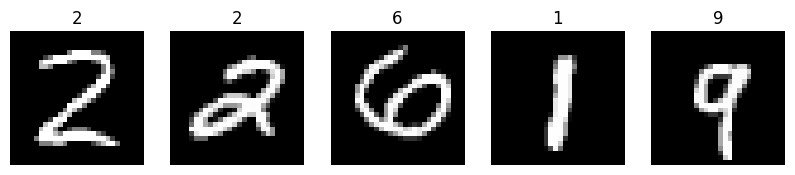

In [3]:
class_names = [str(i) for i in range(10)]
indices = np.random.choice(len(x_train), size = 5 , replace = False)
    
plt.figure(figsize = (2*5,3))
for i, idx in enumerate(indices):
    ax = plt.subplot(1,5,i+1)
    img = x_train[idx]
    plt.imshow(img, cmap = 'gray')
    label = class_names[y_train[idx]]
    plt.title(label)
    plt.axis('off')
plt.show()

### Making the ANN

In [5]:
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
estop = EarlyStopping(monitor = 'val_loss', min_delta= 1e-4, patience= 5, verbose = 1, restore_best_weights=True)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
history = model.fit(x_train,y_train,batch_size=128, epochs = 200, verbose = 1, validation_data=(x_test,y_test), callbacks=[estop])

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8054 - loss: 0.6438 - val_accuracy: 0.9578 - val_loss: 0.1405
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9514 - loss: 0.1642 - val_accuracy: 0.9717 - val_loss: 0.0967
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9643 - loss: 0.1163 - val_accuracy: 0.9759 - val_loss: 0.0787
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9721 - loss: 0.0927 - val_accuracy: 0.9751 - val_loss: 0.0779
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9742 - loss: 0.0807 - val_accuracy: 0.9778 - val_loss: 0.0725
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9792 - loss: 0.0688 - val_accuracy: 0.9811 - val_loss: 0.0663
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9808 - loss: 0.0611 - val_accuracy: 0.9800 - val_loss: 0.0658
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9809 - loss: 0.0588 - val_accu

In [8]:
loss, val_accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9795 - loss: 0.0711


In [9]:
print(f"Validation Accuracy with ANN model: {val_accuracy*100:.4f}%")

Validation Accuracy with ANN model: 98.3300%


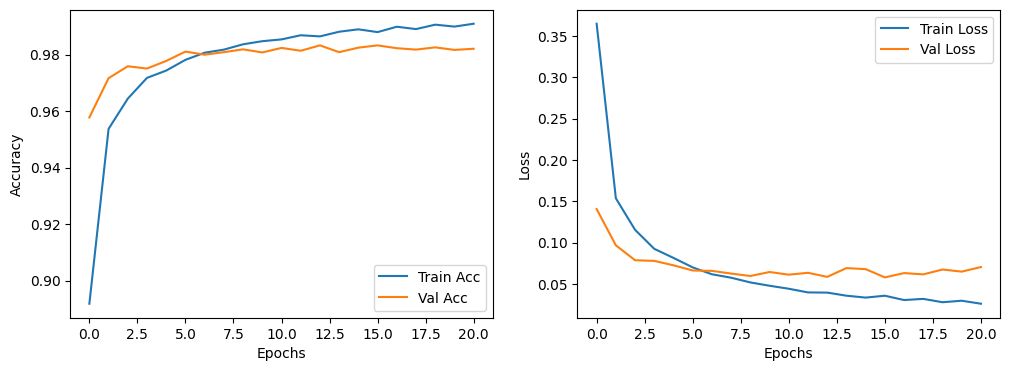

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()


## Question 2: Now let us try to fit a CNN model to accomplish the same task and look at the improvements. Import necessary modules and functions first. Here you can see we are including the Conv2D and MaxPool2d layers from keras.layers.

In [12]:
from tensorflow import keras 
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

### Creating the CNN model

In [15]:
model = Sequential()
model.add(Conv2D(26,5, strides = (1,1), activation = 'relu', padding='valid', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Conv2D(20,3, strides = (1,1), activation = 'relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Conv2D(10,3, strides = (1,1), activation = 'relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 26)     │           676 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 26)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 20)     │         4,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 20)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 10)       │         1,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 360)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        36,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,296 (173.03 KB)

 Trainable params: 44,296 (173.03 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
estop = EarlyStopping(monitor = 'val_loss', min_delta= 1e-4, patience= 5, verbose = 1, restore_best_weights=True)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [17]:
history = model.fit(x_train,y_train,batch_size=128, epochs = 200, verbose = 1, validation_data=(x_test,y_test), callbacks=[estop])

Epoch 1/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8025 - loss: 0.6023 - val_accuracy: 0.9761 - val_loss: 0.0748
Epoch 2/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9697 - loss: 0.0947 - val_accuracy: 0.9678 - val_loss: 0.0981
Epoch 3/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9818 - loss: 0.0587 - val_accuracy: 0.9877 - val_loss: 0.0358
Epoch 4/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9856 - loss: 0.0443 - val_accuracy: 0.9886 - val_loss: 0.0380
Epoch 5/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9883 - loss: 0.0376 - val_accuracy: 0.9828 - val_loss: 0.0541
Epoch 6/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9904 - loss: 0.0305 - val_accuracy: 0.9905 - val_loss: 0.0334
Epoch 7/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9905 - loss: 0.0292 - val_accuracy: 0.9907 - val_loss: 0.0310
Epoch 8/200
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9932 - loss: 0.0233 - 

In [18]:
loss, val_accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9898 - loss: 0.0320


In [19]:
print(f"Validation Accuracy with CNN model: {val_accuracy*100:.4f}%")

Validation Accuracy with CNN model: 99.1700%


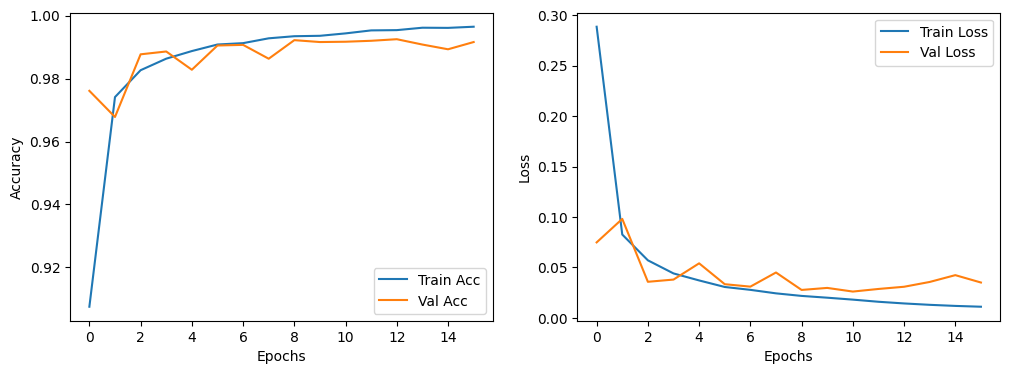

In [20]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()


## Question 3: Now you can try to fit a CNN model with CIFAR10 dataset we have seen in the previous lab with an appropriate model. See whether you get an improved accuracy for the model when you are using CNN models

In [21]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

###  Displaying random images from the dataset

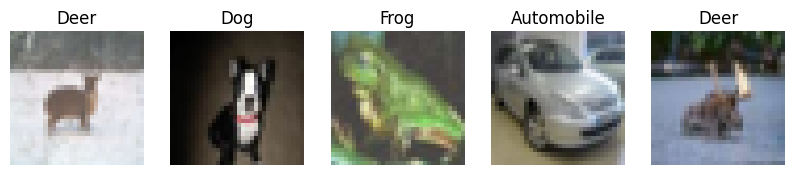

In [22]:
class_names = ["Airplane","Automobile","Bird","Cat","Deer",
"Dog","Frog","Horse","Ship","Truck"]
indices = np.random.choice(len(x_train), size = 5 , replace = False)
plt.figure(figsize = (2*5,3))
for i, idx in enumerate(indices):
    ax = plt.subplot(1,5,i+1)
    img = x_train[idx]
    plt.imshow(img)
    label = class_names[y_train[idx][0]]
    plt.title(label)
    plt.axis('off')
plt.show()

### Building the CNN model

In [24]:
model = Sequential()
model.add(Conv2D(32,5, strides = (1,1), activation = 'relu', padding='same', input_shape = x_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(Dropout(0.5))
model.add(Conv2D(32,3, strides = (1,1), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(64,3, strides = (1,1), activation = 'relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1), padding='valid'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,751,018 (14.31 MB)

 Trainable params: 3,751,018 (14.31 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
estop = EarlyStopping(monitor = 'val_loss', min_delta= 1e-4, patience= 5, verbose = 1, restore_best_weights=True)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
history = model.fit(x_train,y_train,batch_size=128, epochs = 200, verbose = 1, validation_data=(x_test,y_test), callbacks=[estop])

Epoch 1/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 102ms/step - accuracy: 0.2432 - loss: 2.0091 - val_accuracy: 0.4601 - val_loss: 1.5177
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 43s 110ms/step - accuracy: 0.4584 - loss: 1.4745 - val_accuracy: 0.5367 - val_loss: 1.2985
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 93ms/step - accuracy: 0.5290 - loss: 1.3127 - val_accuracy: 0.5738 - val_loss: 1.1988
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 92ms/step - accuracy: 0.5711 - loss: 1.2005 - val_accuracy: 0.5973 - val_loss: 1.1224
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 158ms/step - accuracy: 0.6028 - loss: 1.1177 - val_accuracy: 0.5804 - val_loss: 1.1996
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 179ms/step - accuracy: 0.6270 - loss: 1.0588 - val_accuracy: 0.6431 - val_loss: 1.0033
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 155ms/step - accuracy: 0.6525 - loss: 0.9932 - val_accuracy: 0.6644 - val_loss: 0.9693
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 117ms/step - accuracy: 0.6660 - l

In [27]:
loss, val_accuracy = model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7305 - loss: 0.7857


In [28]:
print(f"Validation Accuracy of Cifar10 dataset with CNN model: {val_accuracy*100:.4f}%")

Validation Accuracy of Cifar10 dataset with CNN model: 73.4200%


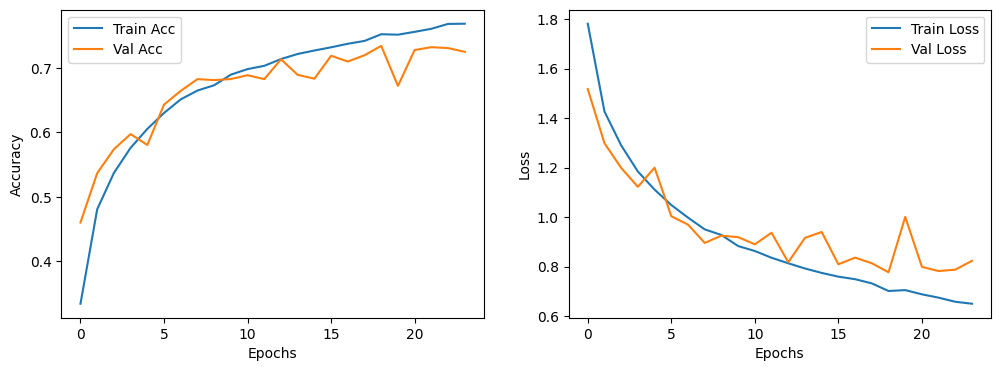

In [29]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()